<a href="https://colab.research.google.com/github/Mashaell22/repot5/blob/main/LSTM_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LSTM tutorial**

## Import libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Random seed

In [32]:
# fix random seed for reproducibility
tf.random.set_seed(7)


## load the dataset

In [33]:
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.



## Normalize the dataset

In [34]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## split into train and test sets

In [35]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


## convert an array of values into a dataset matrix

In [36]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]  # Indent this line
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

## function to prepare the train and test datasets for modeling.

In [37]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [38]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


## Fit the LSTM

In [39]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
94/94 - 3s - 27ms/step - loss: 0.0330
Epoch 2/100
94/94 - 0s - 3ms/step - loss: 0.0157
Epoch 3/100
94/94 - 0s - 3ms/step - loss: 0.0122
Epoch 4/100
94/94 - 0s - 4ms/step - loss: 0.0111
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0101
Epoch 6/100
94/94 - 0s - 3ms/step - loss: 0.0092
Epoch 7/100
94/94 - 0s - 4ms/step - loss: 0.0083
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0074
Epoch 9/100
94/94 - 0s - 3ms/step - loss: 0.0065
Epoch 10/100
94/94 - 0s - 3ms/step - loss: 0.0057
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0050
Epoch 12/100
94/94 - 0s - 3ms/step - loss: 0.0043
Epoch 13/100
94/94 - 0s - 3ms/step - loss: 0.0038
Epoch 14/100
94/94 - 0s - 3ms/step - loss: 0.0033
Epoch 15/100
94/94 - 0s - 3ms/step - loss: 0.0029
Epoch 16/100
94/94 - 0s - 4ms/step - loss: 0.0026
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 18/100
94/94 - 0s - 3ms/step - loss: 0.0023
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 21

## Make preductuion and evaluatuin matrix.

In [40]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Train Score: 22.68 RMSE
Test Score: 52.39 RMSE


## Visualize the result

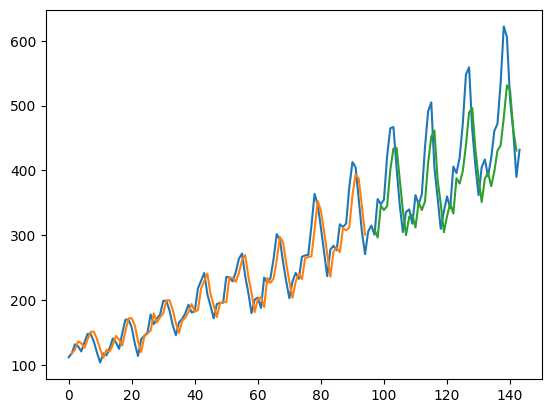

In [41]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# **Well done** :)